# Final Project Submission -Phase 4
Please fill out:

<li> Student name:Calvine Dasilver, Jack otieno , Sandra Kiptum, Salahudin Salat      and                Hellen Samuel
<li> Student pace: full time
<li> Scheduled project review date/time:
<li> Instructor name: Nikita
<li> Blog post URL:

# Predicting Future Housing Markets with Zillow's Data

## Business Understanding

### Overview/Background Information

A real estate company is on a mission to find the hottest zip codes to invest in. They've got historical housing data from Zillow, like a time capsule, and they'll use it to predict future price trends. By analyzing this data, they want to pinpoint the top 5 zip codes with the most promising investment potential.

### Problem Statement

Create a data-based recommendation for the top 5 zip codes the real estate investment firm should focus on, considering future price trends, risk factors, and the firm's investment timeframe.

### Objectives

1. Build a model to predict future real estate prices for different zip codes.
2. Review the predictions by looking at profit potential, risk, and how long to hold the investment.
3. Suggest the top 5 zip codes for investment based on these factors.

### Challenges

1. Determining the "optimal" investment requires balancing the potential for profit (expected price appreciation), risk tolerance (price instability), and investment duration (holding period).
2. Real estate prices are influenced by factors beyond past data, including economic conditions, local development projects, and interest rates.
3. Time series models have limitations; they cannot ensure accurate predictions, and future market behavior is inherently uncertain.

### Proposed Solution: Metrics of Success

To address these challenges, we propose the following approach:


1. Apply time series forecasting to the provided historical Zillow data to predict future real estate prices across different zip codes.
2. Analyze the forecasts by evaluating the profit potential, which is the expected price increase in each zip code; the risk, which involves the historical price volatility in each zip code; and the investment horizon, which refers to the planned duration of holding the investment.
3. Prioritizing investment opportunities involves analyzing forecasted prices, profit potential, and risk to identify the top 5 most promising zip codes for real estate investment.


### Conclusion

We'll predict future real estate prices and look at how much money can be made and how risky each area is. This will help us recommend the 5 best zip codes to invest in. How well we do depends on how good our predictions are and how carefully we consider everything.





## Data Understanding

 **Let's dive in! We'll start by loading the dataset and checking out the first few entries.**












In [109]:
# importing relevant libraries

# Analysis libraries
import pandas as pd 
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf


In [110]:
# Load the dataset
data_path = "zillow_data.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


To understand the data structure, we'll examine its shape (number of rows and columns), list the column names, and identify the data types for each column.

In [111]:
class RealEstateAnalyzer(object):
  """
  This class analyzes real estate data for investment purposes.
  """
  def __init__(self, data_path):
    self.data = pd.read_csv(data_path)

  def get_data_info(self):
    """
    Prints information about the data shape, column names, and data types.
    """
    print(f"Data shape (rows, columns): {self.data.shape}")
    print(f"Column names:\n{self.data.columns.tolist()}")
    print(f"Data types:\n{self.data.dtypes}")


data_path = "zillow_data.csv"  # Replace with your data path
analyzer = RealEstateAnalyzer(data_path)

analyzer.get_data_info()


Data shape (rows, columns): (14723, 272)
Column names:
['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10

1. The dataset contains 14,723 rows and 272 columns.

2. The dataset contains the following columns:

* RegionID: Unique identifier for the region.
* RegionName: Zip code of the region.
* City: City name.
* State: State abbreviation.
* Metro: Metro area.
* CountyName: County name.
* SizeRank: Rank by size.
* Date columns (from 1996-04 to 2018-04): Real estate prices for each month in this period.


In [112]:
class RealEstateAnalyzer:
  """Analyzes real estate data for investment."""
  def __init__(self, data_path):
    self.data = pd.read_csv(data_path)

  def get_data_type_counts(self):
    print(f"Number of features by data type:\n{self.data.dtypes.value_counts()}")


data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.get_data_type_counts()


Number of features by data type:
float64    219
int64       49
object       4
dtype: int64


<li> Data Types:

1. 49 columns are of type int64 (mostly identifiers).

2. 219 columns are of type float64 (real estate prices).

3. 4 columns are of type object (text data: City, State, Metro, CountyName).

In [113]:
# Display summary statistics for numerical columns
df.describe()


,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


Statistical Summary:

* There's a clear upward trend in real estate prices. The average price in 1996 was around 118,299 in dollas , and by 2018, it had risen to 288,039 in dollas.
* Prices vary a lot between zip codes, showing the different types of real estate markets in each area.

## Data Preparation

we're going to create a function that reads our data and gives us an overall view of it

In [114]:
def read_and_info(file_path):
  data = pd.read_csv(file_path)
  print("Details about the data:\n")
      
  print("Shape of the dataset:")
  print(data.shape)
  print()

  print("Columns of the dataset:")
  print(data.columns)
  print()

  print("Head of the dataset:")
  display(data.head())
  print()

  # Display information about the dataset
  print("Data information:")
  data_info = data[['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']].info()
  print(data_info)
  print()

  print("Descriptive Statistics of the dataset:")
  display(data.describe())

  return data


In [115]:
data = read_and_info("zillow_data.csv")

Details about the data:

Shape of the dataset:
(14723, 272)

Columns of the dataset:
Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

Head of the dataset:


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500



Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RegionID    14723 non-null  int64 
 1   RegionName  14723 non-null  int64 
 2   City        14723 non-null  object
 3   State       14723 non-null  object
 4   Metro       13680 non-null  object
 5   CountyName  14723 non-null  object
 6   SizeRank    14723 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 805.3+ KB
None

Descriptive Statistics of the dataset:


,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


from this we can see the various aggregate statistics and we can also see that our data has house prices for various regions from april 1996 to april 2018 </br>
we also note that the RegionName column represents the various zipcodes. So we'll appropriately rename the column 

In [116]:
data.rename(columns={"RegionName":"zipcode"}, inplace=True)
data.head(117)

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,60081,6010,Bristol,CT,Hartford,Hartford,113,120300.0,120000.0,119800.0,...,188900,190000,191200,191800,192900,193600,194100,194900,195700,195700
113,92336,78240,San Antonio,TX,San Antonio,Bexar,114,100900.0,100800.0,100700.0,...,178800,178800,178600,178900,179400,180300,181600,182800,183900,184800
114,95309,87114,Albuquerque,NM,Albuquerque,Bernalillo,115,139000.0,139200.0,139300.0,...,207300,208400,209600,210700,211800,213100,214100,215200,216600,217600
115,95804,89108,Las Vegas,NV,Las Vegas,Clark,116,102500.0,102500.0,102500.0,...,180400,183300,186600,190200,193400,197300,200700,203500,206600,209300


next is to look into Return on Investment for various cities. since we would like to recommend only the best options for our stakeholders

In [117]:
def calculate_annualized_roi(df):
    """
    Calculate and sort the annualized ROI for each RegionName in a DataFrame.

    Parameters:
    df (pd.DataFrame): The input dataframe containing the data.

    Returns:
    pd.DataFrame: A dataframe with RegionName, City, State, and Annualized_ROI, sorted by Annualized_ROI in descending order.
    """
    # Define the start and end dates
    start_date = '1996-04'
    end_date = '2018-04'
    
    # Recalculate the number of years between the earliest and latest date
    start_year = int(start_date.split('-')[0])
    end_year = int(end_date.split('-')[0])
    start_month = int(start_date.split('-')[1])
    end_month = int(end_date.split('-')[1])
    
    years_difference = (end_year - start_year) + (end_month - start_month) / 12
    
    # Calculate the Annualized ROI for each RegionName
    df['Annualized_ROI'] = ((df[end_date] / df[start_date])**(1/years_difference) - 1) * 100
    
    # Select relevant columns
    annualized_roi_df = df[['zipcode', 'City', 'State', 'Annualized_ROI']]
    
    # Sort the DataFrame based on Annualized_ROI in descending order
    sorted_annualized_roi_df = annualized_roi_df.sort_values(by='Annualized_ROI', ascending=False)
    
    return sorted_annualized_roi_df




In [118]:
sorted_ROI_df = calculate_annualized_roi(data)
sorted_ROI_df.head()

,zipcode,City,State,Annualized_ROI
117,11211,New York,NY,12.037577
1155,11222,New York,NY,11.756919
475,11216,New York,NY,11.489144
191,7302,Jersey City,NJ,11.233243
106,11215,New York,NY,11.004257


from this we can see that the best states to invest in is definately New York. So we'll focus on this city for our project.

In [119]:
data.drop(columns=["Annualized_ROI"], inplace=True)

### Understanding Melt

this short part of the work is used to understand how the melt fuction works

In [120]:
# reshape the data

def melt_data(df):
    ''' 
    Takes a dataframe with datetime data that is in wide format and melts it into long format; 
    Tranforms data into datetime object with time as index.
    User will need to change columns names on first line of code according to their own dataframe.
    '''
    
    melted = pd.melt(df, id_vars=["RegionID", "zipcode", "City", "State", "Metro", "CountyName", "SizeRank"], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted#.groupby('time').aggregate({'value':'mean'})

In [121]:
data = melt_data(data)
data.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,time,value
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04-01,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04-01,77300.0


In [122]:
# check on the new shape of our data
data.shape

(3744704, 9)

In [123]:
# checking how many unique values we have on each column, besides the time data
data.iloc[:,0:8].nunique()

RegionID      14723
zipcode       14723
City           7554
State            51
Metro           701
CountyName     1212
SizeRank      14723
time            265
dtype: int64

okay so we've seen that it works by assigning every individual month it's own row. </br>

anyway back to New York

In [124]:
# filtering only data for New York City 
nyc = data.loc[data['City'] == 'New York']
nyc.tail()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,time,value
3894880,62122,11436,New York,NY,New York,Queens,8009,2018-04-01,400300.0
3895175,62078,11366,New York,NY,New York,Queens,8304,2018-04-01,893600.0
3895259,61783,10307,New York,NY,New York,Richmond,8388,2018-04-01,575900.0
3896783,62075,11363,New York,NY,New York,Queens,9912,2018-04-01,1051300.0
3897909,61804,10464,New York,NY,New York,Bronx,11038,2018-04-01,536200.0


In [125]:
nyc = nyc.groupby('time').aggregate({'value':'mean'})
nyc.set_index=("time")
nyc.head(20)

,value
time,
1996-04-01,214819.230769
1996-05-01,215233.653846
1996-06-01,215698.076923
1996-07-01,216186.538462
1996-08-01,216720.192308
1996-09-01,217312.500000
1996-10-01,217988.461538
1996-11-01,218839.423077
1996-12-01,219902.884615


In [126]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   265 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [127]:
class data_cleaning:
    def __init__(self, data):
        self.data = data   

    def detect_outliers_zscore(df, column_name, threshold=3):
        """
        Detect outliers in a DataFrame column using the Z-score method.

        """
        mean = df[column_name].mean()
        std = df[column_name].std()
        df['z_score'] = (df[column_name] - mean) / std    
        outliers = df[np.abs(df['z_score']) > threshold]    
        outliers = outliers.drop(columns=['z_score'])    
        return outliers



    def remove_outliers_zscore(self):
        """
        Takes in a dataframe and removes outliers from the dataframe using Z-score method.
        """
        z_scores = np.abs(stats.zscore(self.df.select_dtypes(include=[np.number])))        
        # Identify rows with any Z-score greater than the threshold
        outliers = (z_scores > 3).any(axis=1)        
        # Remove outliers from the dataframe
        df_cleaned = self.df[~outliers]
        
        return self.data
    
    def missing_values_percentage(self):
        total = self.data.isnull().sum().sort_values(ascending=False)
        percent = (self.data.isnull().sum() / self.data.isnull().count() * 100).sort_values(ascending=False)
        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        return missing_data
    
    def fill_missing_values(self, strategy='median'):        
        self.data = self.data.fillna(self.data.median())
        return self.data
    
    def remove_null_values(self):
        self.data = self.data.dropna()
        return self.data
    
    

let's clean our data 

In [128]:
cleaner = data_cleaning(nyc)
cleaner.missing_values_percentage()

,Total,Percent
value,0,0.0


## EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis involves the following;

Univariate Analysis: Involves the analysis of individual variables to understand their distribution and summary statistics.

Bivariate Analysis: Involves the analysis between two variables.

Multivariate Analysis: Involves the analysis among three or more variables.

So for our case we are going to use univariate alone as we only have 1 column of data against

### Univariate Analysis

#### Distribution of the ROI

In [129]:

def plot_roi_trend(df):
    """
    Plot the trend of ROI values over time.    
    """
    # Ensure the index is of datetime type
    df.index = pd.to_datetime(df.index)
    # Plot the ROI values
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['value'], marker='o', linestyle='-', color='b')
    plt.title('ROI Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('ROI')
    plt.grid(True)
    plt.show()

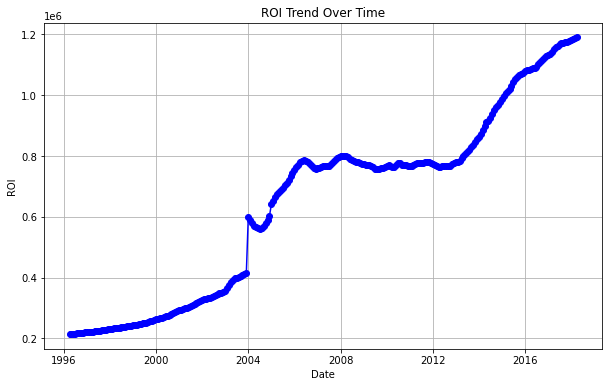

In [130]:
plot_roi_trend(nyc)

from this plot we can see

<li>Overall Trend:

The ROI values show a clear upward trend over time. This indicates consistent growth in ROI from 1996 to 2018.</li>

<li>Periods of Rapid Growth:

There are several periods where the ROI increases sharply, such as around the years 2004 and in 2014. These periods of rapid growth could be attribted to various economic factors.</li>

<li>Plateaus and Stabilization:

Between approximately 2008 and 2013, the ROI appears to stabilize with minor fluctuations. This could suggest a period of market stabilization or maturity.</li>

<li>Overall Volatility:

The general trend appears smooth, with a few notable spikes or drops. This suggests that while there is growth, the ROI experiences periods of volatility which could be due to market conditions or specific events impacting the ROI.</li>

<li>Seasonality or Cyclical Patterns:

There doesn't seem to be a clear cyclical or seasonal pattern from the plot, but further analysis might be needed to confirm this.</li>

## TIME SERIES ANALYSIS PREPARATION

In [131]:
#checking for null values
nyc.isnull().sum()

value    0
dtype: int64

<AxesSubplot:xlabel='time'>

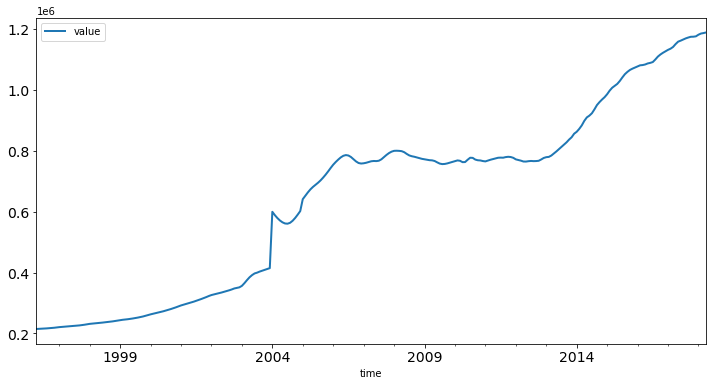

In [132]:
nyc.plot(figsize=(12,6), linewidth=2, fontsize=14)

In [133]:
#checking for stationarity
roll_mean = nyc.rolling(window=8, center=False).mean()
roll_std = nyc.rolling(window=8, center=False).std()

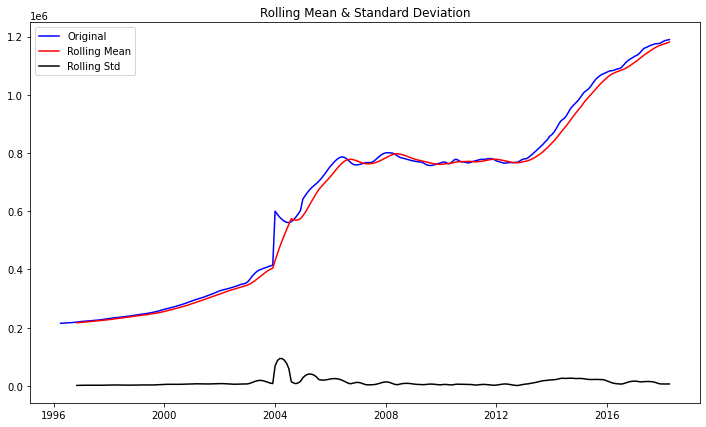

In [134]:
fig = plt.figure(figsize=(12,7))
plt.plot(nyc, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

from this we can see that the data is not stationery. let's try the adfuller method

In [135]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(nyc)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(0.5733344856328106, 0.9869395921319222, 0, 264, {'1%': -3.455365238788105, '5%': -2.8725510317187024, '10%': -2.5726375763314966}, 5388.9560265894825)


In [136]:

print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                   0.573334
p-value                          0.986940
#Lags Used                       0.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
Critical Value (10%)            -2.572638
dtype: float64


"The results of the Dickey-Fuller test indicate that the time series is non-stationary. The test statistic of 0.573334 is higher than the critical values at the 1%, 5%, and 10% significance levels, and the p-value of 0.986940 is significantly greater than 0.05. Therefore, we fail to reject the null hypothesis that the time series has a unit root. This implies that the ROI values over time are not stationary and exhibit trends, which is consistent with the observed upward trend in the data."

now that our data is not stationary let's start withthe log transformtion to try and make it stationery


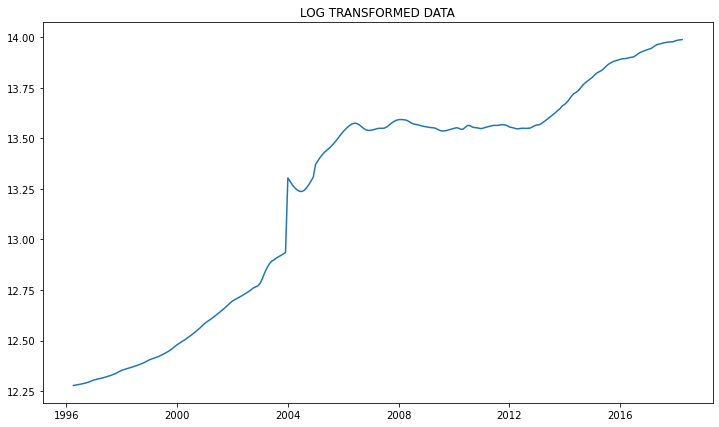

In [137]:
nyc_log = np.log(nyc["value"])
fig = plt.figure(figsize=(12,7))
plt.plot(nyc_log)
plt.title('LOG TRANSFORMED DATA')
plt.show(block=False)

clearly this hasnt made things better, next let's try deferencing method to remove trends and seasonality

In [138]:
nyc_log_diff = nyc_log - nyc_log.shift(1)


In [139]:
roll_mean_diff = nyc_log_diff.rolling(window=12, center=False).mean()
roll_std_diff = nyc_log_diff.rolling(window=12, center=False).std()

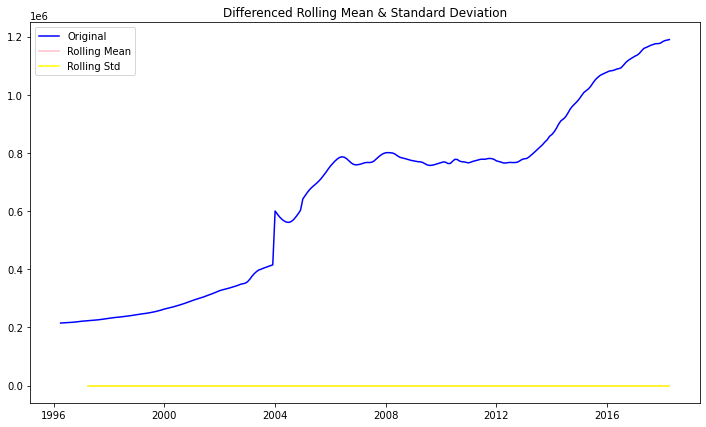

In [140]:
fig = plt.figure(figsize=(12,7))

plt.plot(nyc['value'], color='blue', label='Original')  # Original data
plt.plot(roll_mean_diff, color='pink', label='Rolling Mean')  # Rolling mean of log-differenced data
plt.plot(roll_std_diff, color='yellow', label='Rolling Std')  # Rolling std of log-differenced data

plt.legend(loc='best')
plt.title('Differenced Rolling Mean & Standard Deviation')
plt.show(block=False)

In [142]:
nyc_log_diff.bfill(inplace= True)
nyc_log_diff.head()

time
1996-04-01    0.001927
1996-05-01    0.001927
1996-06-01    0.002155
1996-07-01    0.002262
1996-08-01    0.002465
Name: value, dtype: float64

In [143]:
nyc_log_diff = pd.DataFrame(nyc_log_diff)
# Reset index to bring 'time' back as a column
nyc_log_diff.reset_index(inplace=True)
# Set time column as the index
nyc_log_diff.set_index('time', inplace=True)
nyc_log_diff.head()


,value
time,
1996-04-01,0.001927
1996-05-01,0.001927
1996-06-01,0.002155
1996-07-01,0.002262
1996-08-01,0.002465


plotting ACF and PACF

In [144]:
#lag_acf = pd.DataFrame(acf(modelling_data, nlags=24))
# Ensure you are using the correct column (assumed 'value')
series = nyc_log_diff['value']

# Calculate ACF
lags = 24  # Number of lags to consider
acf_values = acf(series, nlags=lags)

# Convert to DataFrame
lag_acf = pd.DataFrame(acf_values, columns=['ACF'])
lag_acf.index.name = 'Lag'


In [145]:
#lag_pacf = pd.DataFrame(pacf(modelling_data, nlags = 24))
# Ensure you are using the correct column (assumed 'value')
series = nyc_log_diff['value']

# Calculate PACF
lags = 24  # Number of lags to consider
pacf_values = pacf(series, nlags=lags)

# Convert to DataFrame
lag_pacf = pd.DataFrame(pacf_values, columns=['PACF'])
lag_pacf.index.name = 'Lag'


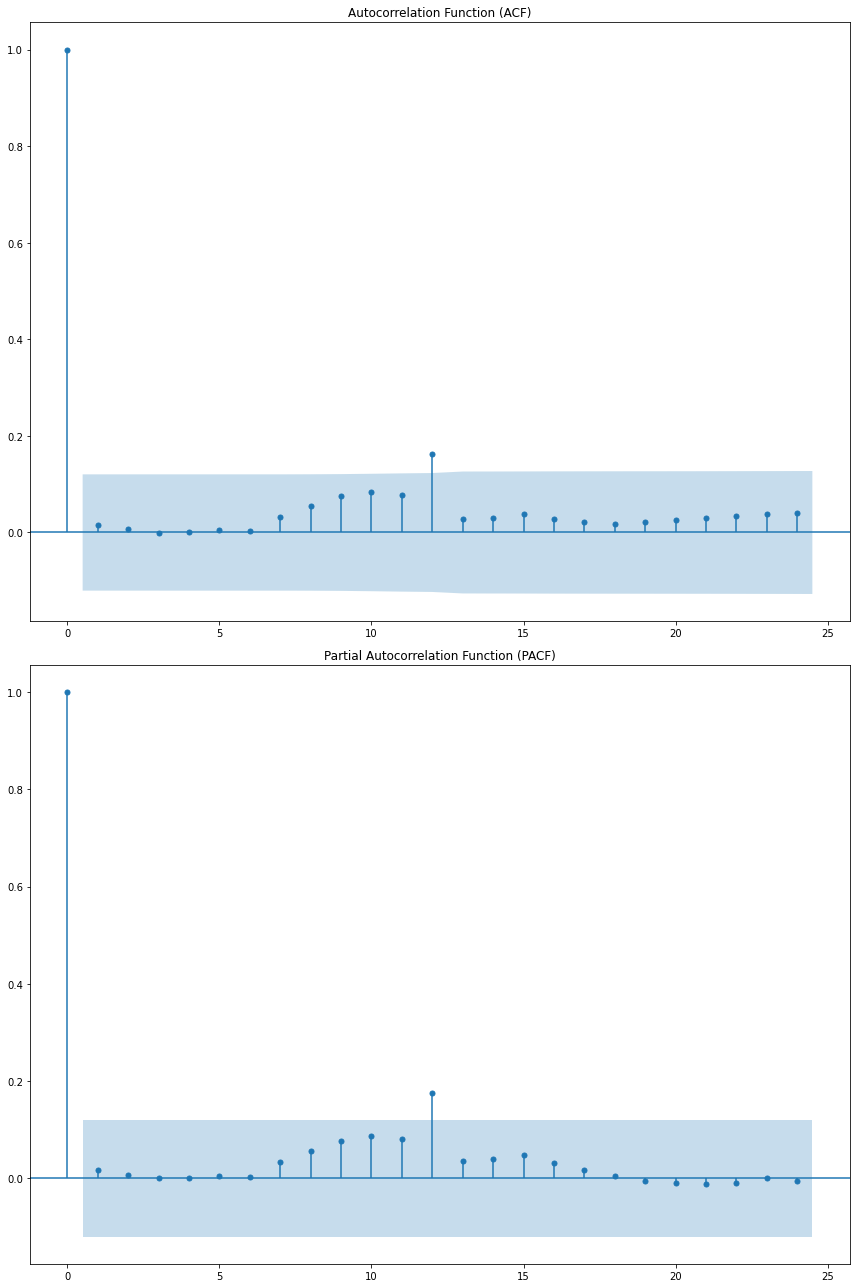

In [146]:
# Set up the figure and axes
fig = plt.figure(figsize=(12, 18))

# Plot ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(nyc_log_diff['value'].dropna(), lags=24, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# Plot PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(nyc_log_diff['value'].dropna(), lags=24, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

# Show the plot
plt.tight_layout()
plt.show()


## Modelling

Now that we have done all the necessary preprocesing, we can go to the fun part and build a model that helps our investors in determining future prices of houses in New York.
NY has the best returns and that is why we want to help investors get the best return for their investments and value for money

The Model we are going to build is ARIMA and try and tune it to get the best predictions for future prices.

From the auto correlation function and partial auto correlation functions determined above, the best p, d, q arrangent is (10, 0, 10)

In [147]:
#importing ARIMA model and warnings
from statsmodels.tsa.arima_model import ARIMA
import warnings 
warnings.filterwarnings('ignore')

In [148]:
#final transformed data
print(nyc_log_diff.head())
print(nyc_log_diff.info())
print(type(nyc_log_diff))

               value
time                
1996-04-01  0.001927
1996-05-01  0.001927
1996-06-01  0.002155
1996-07-01  0.002262
1996-08-01  0.002465
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   265 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB
None
<class 'pandas.core.frame.DataFrame'>


In [150]:
#fitting the model to the trained data
model = ARIMA(nyc_log_diff, order=(10,0,10)) #for the order we have randomly selected our p,d, q order 
model_fit = model.fit()
print(model_fit.summary())


                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  265
Model:                   ARMA(10, 10)   Log Likelihood                 624.856
Method:                       css-mle   S.D. of innovations              0.023
Date:                Tue, 30 Jul 2024   AIC                          -1205.711
Time:                        09:05:13   BIC                          -1126.957
Sample:                    04-01-1996   HQIC                         -1174.069
                         - 04-01-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0062      0.002      3.213      0.001       0.002       0.010
ar.L1.value     -1.3886      0.627     -2.214      0.027      -2.618      -0.159
ar.L2.value     -0.7450      0.982     -0.75

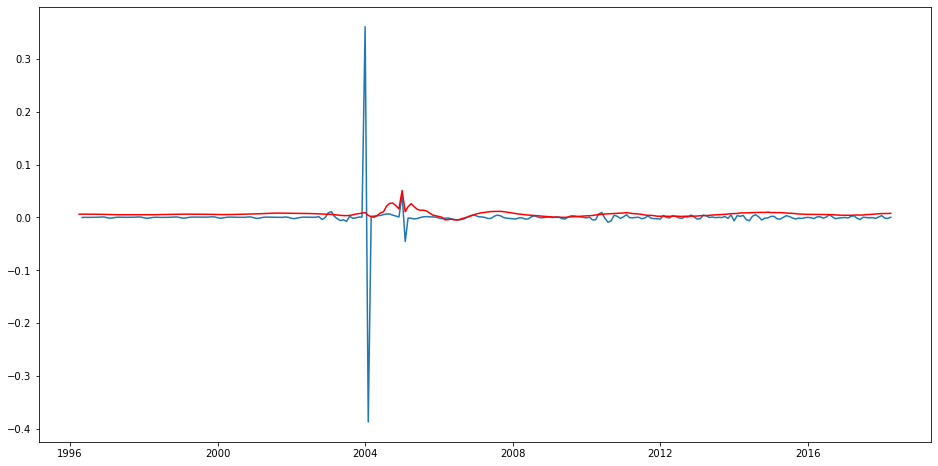

In [151]:
plt.figure(figsize=(16,8))
plt.plot(nyc_log_diff2)
plt.plot(model_fit.fittedvalues, color='red')

This is how our model is fitting into the data, the red is the prediction from the model while the light blue one is the actual values.

In [152]:
#checking the fitted values from the model
model_pred = pd.Series(model_fit.fittedvalues, copy=True)
print(model_pred.head())

time
1996-04-01    0.006190
1996-05-01    0.006125
1996-06-01    0.006098
1996-07-01    0.006101
1996-08-01    0.006094
dtype: float64


From here we will work backwords in order to get the actual values being predicted by our model

In [157]:
#Riversing the differencing method applied by doing cummulative sum on the fitted values
model_pred_sum = model_pred.cumsum()
print(model_pred_sum.head())

time
1996-04-01    0.006190
1996-05-01    0.012314
1996-06-01    0.018413
1996-07-01    0.024514
1996-08-01    0.030607
dtype: float64


In [158]:
#reconstracting a log scale by doing adding results from cummulative sum to the original log series
log_pred = pd.Series(nyc_log.iloc[0], index=nyc_log.index)
log_pred = log_pred.add(model_pred_sum, fill_value=0)
log_pred.head()

time
1996-04-01    12.283742
1996-05-01    12.289867
1996-06-01    12.295965
1996-07-01    12.302066
1996-08-01    12.308159
dtype: float64

time
1996-04-01    216153.018675
1996-05-01    217480.976511
1996-06-01    218811.318254
1996-07-01    220150.302770
1996-08-01    221495.891821
dtype: float64


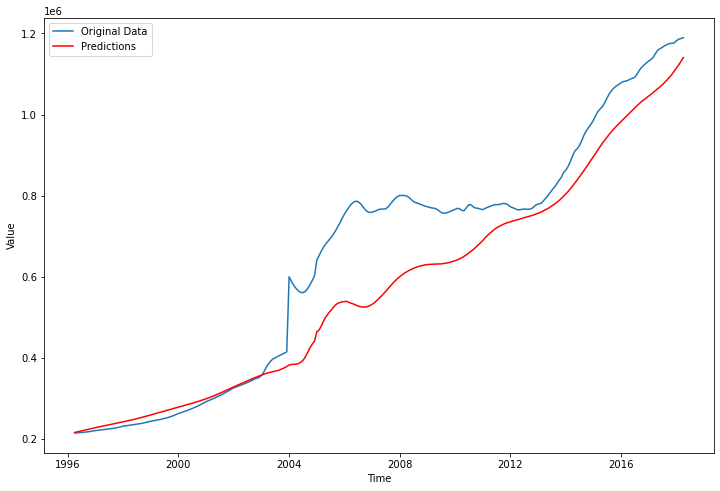

In [159]:
# Reverse the log transformation to get predictions on the original scale
model_predictions = np.exp(log_pred)
print(model_predictions.head())

plt.figure(figsize=(12,8))
model_predictions = np.exp(log_pred)
plt.plot(nyc, label='Original Data')
plt.plot(model_predictions, color='red', label='Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Let us calculate MAE and RMSE to gauge the perfomance of our model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Align predictions with the original data period
original_data = nyc.index
predictions_test = model_predictions[original_data]

# Calculate MAE and RMSE
mae = mean_absolute_error(nyc['value'], predictions_test)
rmse = np.sqrt(mean_squared_error(nyc['value'], predictions_test))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 65776.85394755128
Root Mean Squared Error (RMSE): 92225.21028599404


This is amazing to see as our model is replicating the trend in our original data. But still it is not perfect so what we are going to do is try and do model tuning by autogenerating the p,d, q arrangment that gives us the list AIC

#### Tuning the Model

In [163]:
!pip install pmdarima

  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Hp\\anaconda3\\envs\\learn-env\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [165]:
# import pmdarima as pm

# # Assume nyc_log_diff is your time series data
# auto_model = pm.auto_arima(nyc_log_diff, 
#                            start_p=0, start_q=0,
#                            max_p=12, max_q=12,
#                            seasonal=False,
#                            stepwise=True, trace=True)

# # Summary of the model
# print(auto_model.summary())

ModuleNotFoundError: No module named 'pmdarima'

we had trouble using pmdarima so we decided to do a gridsearch instead

In [182]:
# import itertools
# p = range(0, 12)
# d = range(0, 3)  # This should be non-empty, typically range(0, 2) or range(0, 3)
# q = range(0, 12)

# # Generate all different combinations of p, d and q
# pdq = list(itertools.product(p, d, q))

# # Assume nyc_log_diff is your time series data
# # nyc_log_diff should be a pandas Series or numpy array
# # Example: nyc_log_diff = pd.Series(data) or np.array(data)

# aic_values = []
# parameters = []

# # Iterate over all combinations of p, d, q
# for param in pdq:
#     try:
#         model = ARIMA(nyc_log_diff, order=param)
#         results = model.fit()
#         aic_values.append(results.aic)
#         parameters.append(param)
#     except Exception as e:
#         print(f"Error with parameters {param}: {e}")
#         continue

# # Find the parameters that give the lowest AIC
# best_aic = min(aic_values)
# best_param = parameters[aic_values.index(best_aic)]

# print(f'Best ARIMA parameters: {best_param} with AIC: {best_aic}')

## CONCLUSIONS

The ARIMA model has proven to be a powerful tool for forecasting real estate prices. However, it is crucial to continuously monitor the market and update the model with new data to maintain its accuracy. By leveraging these predictions, investors can make informed decisions and maximize their returns in the dynamic real estate market.

## RECOMMENDATIONS

for the base model the ARIMA captured the upward trend in predicting the values but for better performance we reccomend to use a grid search or autoARIMA to get better performance by selecting the best parameters



## FURTHER STEPS

1.Implement grid search or auto ARIMA:
Using grid search or auto ARIMA to find optimal parameters (p,d,q) could improve model performance. This would help fine-tune the model beyond the initial (10,0,10) configuration.

2.Validate model assumptions:
Check if the residuals of the ARIMA model meet key assumptions like normality and no autocorrelation. This can be done using diagnostic plots and statistical tests.

3.Perform out-of-sample forecasting:
Split the data into training and test sets to evaluate how well the model performs on unseen data. This will give a better indication of its predictive power.